%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
data = pd.read_csv("data_BMI.csv")

In [5]:
data.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH20,SCC,FAF,TUE,CALC,MTRANS,Nobeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          906 non-null    int32  
 1   Age                             906 non-null    float64
 2   Height                          906 non-null    float64
 3   Weight                          906 non-null    float64
 4   family_history_with_overweight  906 non-null    int32  
 5   FAVC                            906 non-null    int32  
 6   FCVC                            906 non-null    float64
 7   NCP                             906 non-null    float64
 8   CAEC                            906 non-null    int32  
 9   SMOKE                           906 non-null    int32  
 10  CH20                            906 non-null    float64
 11  SCC                             906 non-null    int32  
 12  FAF                             906 

In [6]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

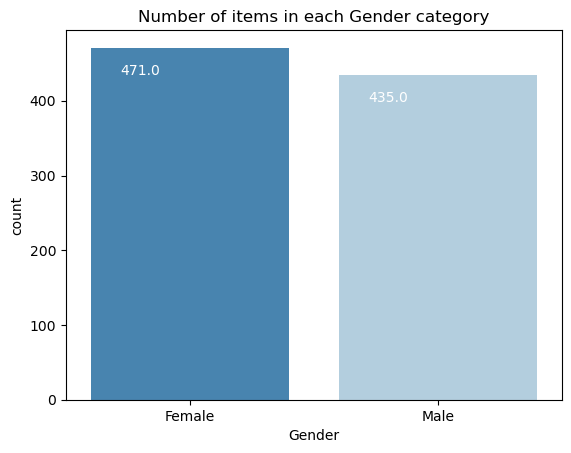

In [7]:
count_values(data, "Gender")

In [8]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [9]:
data["Age"].describe()

count    906.000000
mean      22.292383
std        5.910373
min       14.000000
25%       18.871825
50%       21.000000
75%       23.000000
max       61.000000
Name: Age, dtype: float64

In [10]:
data["Age"].median()

21.0

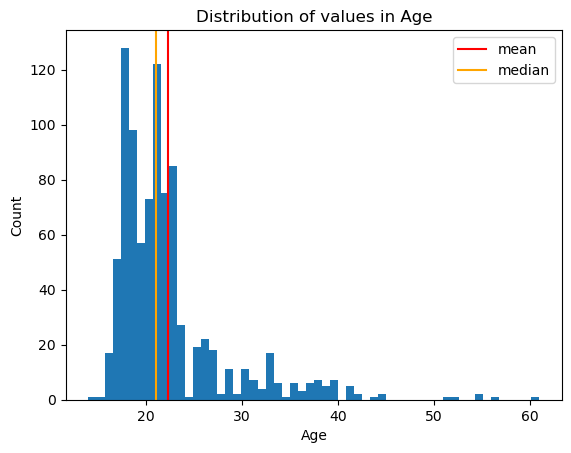

In [11]:
plot_distribution(data, "Age")

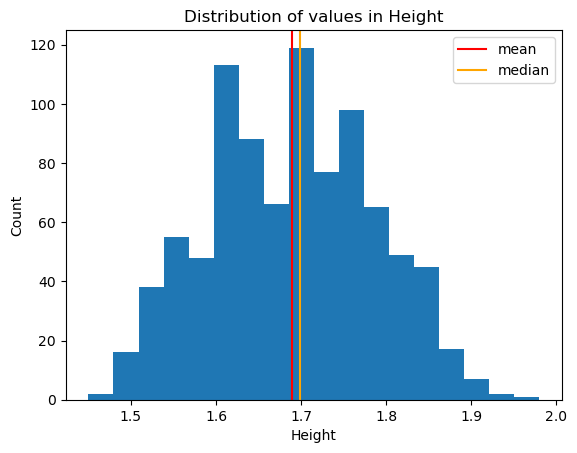

In [12]:
plot_distribution(data, "Height")

In [ ]:
#Random Forest Classifier

In [13]:
label_encoders = {}
for column in data.columns:
    if data[column].dtype == object:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features and target
X = data.drop('Nobeyesdad', axis=1)
y = data['Nobeyesdad']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
predictions = model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
mlr_mse = mean_squared_error(y_test, predictions)
mlr_r2 = r2_score(y_test, mlr_predictions)
print(f"Random Forest MSE: {mlr_mse}")
print(f"Random Forest R^2: {mlr_r2}")

Accuracy: 82.97%
Multiple Linear Regression MSE: 2.4065934065934065
Multiple Linear Regression R^2: 0.40135993693562033


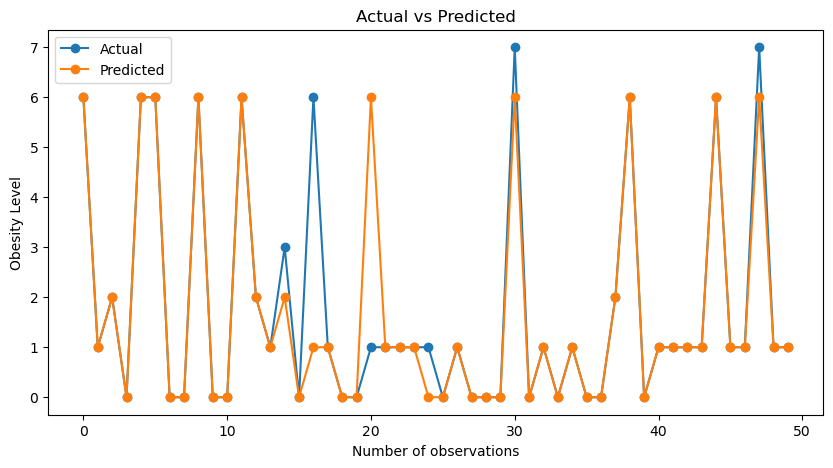

In [19]:
def plot_actual_vs_predicted(y_test, predictions):
    df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    df = df.reset_index(drop=True)
    
    plt.figure(figsize=(10,5))
    plt.plot(df[:50], marker='o')
    plt.title('Actual vs Predicted')
    plt.xlabel('Number of observations')
    plt.ylabel('Obesity Level')
    plt.legend(['Actual', 'Predicted'])
    plt.show()

# Call the function to plot the graph
plot_actual_vs_predicted(y_test, predictions)

In [11]:
#KNN Model

KNN Model Accuracy: 0.7417582417582418


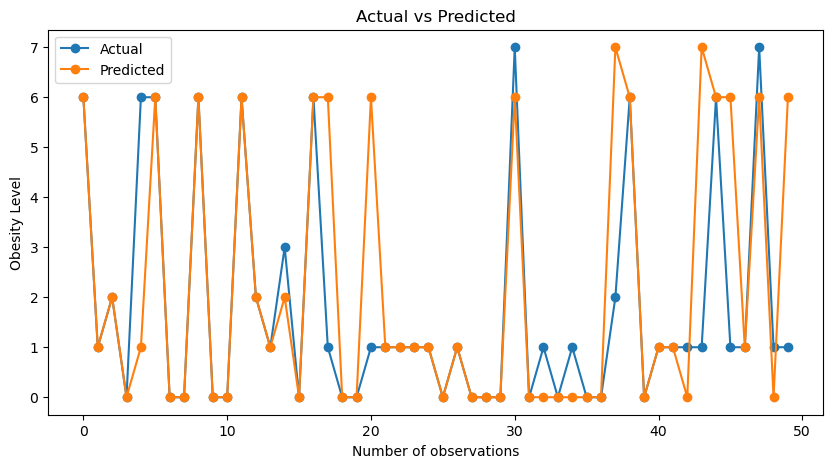

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"KNN Model Accuracy: {knn_accuracy}")
plot_actual_vs_predicted(y_test, knn_predictions)

In [ ]:
#Linear Regression Model

Multiple Linear Regression MSE: 3.875961270532006
Multiple Linear Regression R^2: 0.40135993693562033


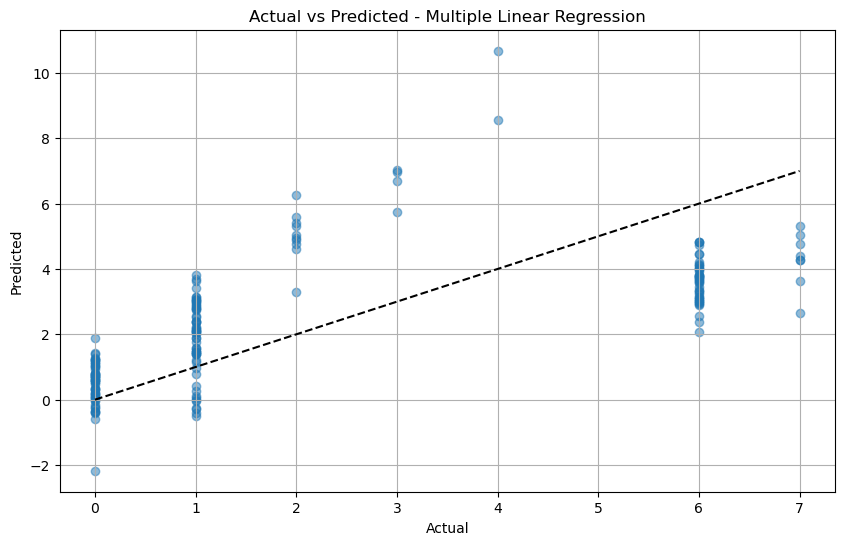

In [23]:

mlr = LinearRegression()

mlr.fit(X_train, y_train)

mlr_predictions = mlr.predict(X_test)

mlr_mse = mean_squared_error(y_test, mlr_predictions)
mlr_r2 = r2_score(y_test, mlr_predictions)
print(f"Multiple Linear Regression MSE: {mlr_mse}")
print(f"Multiple Linear Regression R^2: {mlr_r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, mlr_predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Multiple Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')  # Diagonal line
plt.grid(True)
plt.show()

In [30]:
#Accuracy Levels
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"K-Nearest Neighbors Regression MSE: {knn_mse}")
print(f"K-Nearest Neighbors Regression R^2: {knn_r2}")

# For Linear Regression
lr_mse = mean_squared_error(y_test, mlr_predictions)
lr_r2 = r2_score(y_test, mlr_predictions)
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R^2: {lr_r2}")

# For Multiple Linear Regression
mlr_mse = mean_squared_error(y_test, mlr_predictions)
mlr_r2 = r2_score(y_test, mlr_predictions)
print(f"Multiple Linear Regression MSE: {mlr_mse}")
print(f"Multiple Linear Regression R^2: {mlr_r2}")

K-Nearest Neighbors Regression MSE: 3.620879120879121
K-Nearest Neighbors Regression R^2: 0.4407572331149604
Linear Regression MSE: 3.875961270532006
Linear Regression R^2: 0.40135993693562033
Multiple Linear Regression MSE: 3.875961270532006
Multiple Linear Regression R^2: 0.40135993693562033


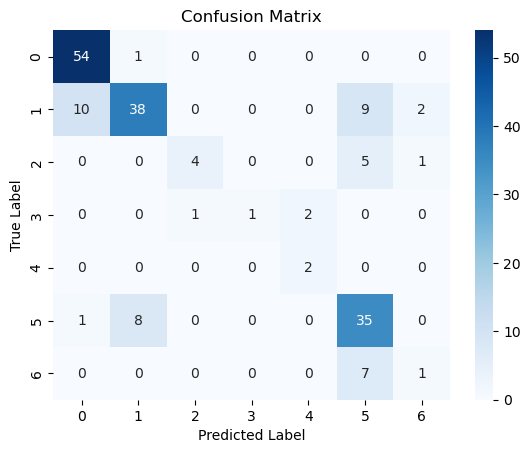

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        55
           1       0.81      0.64      0.72        59
           2       0.80      0.40      0.53        10
           3       1.00      0.25      0.40         4
           4       0.50      1.00      0.67         2
           6       0.62      0.80      0.70        44
           7       0.25      0.12      0.17         8

    accuracy                           0.74       182
   macro avg       0.69      0.60      0.58       182
weighted avg       0.75      0.74      0.73       182

KNN Model Accuracy: 0.74


In [26]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
class_report = classification_report(y_test, knn_predictions)
print(class_report)
print(f"KNN Model Accuracy: {knn_accuracy:.2f}")

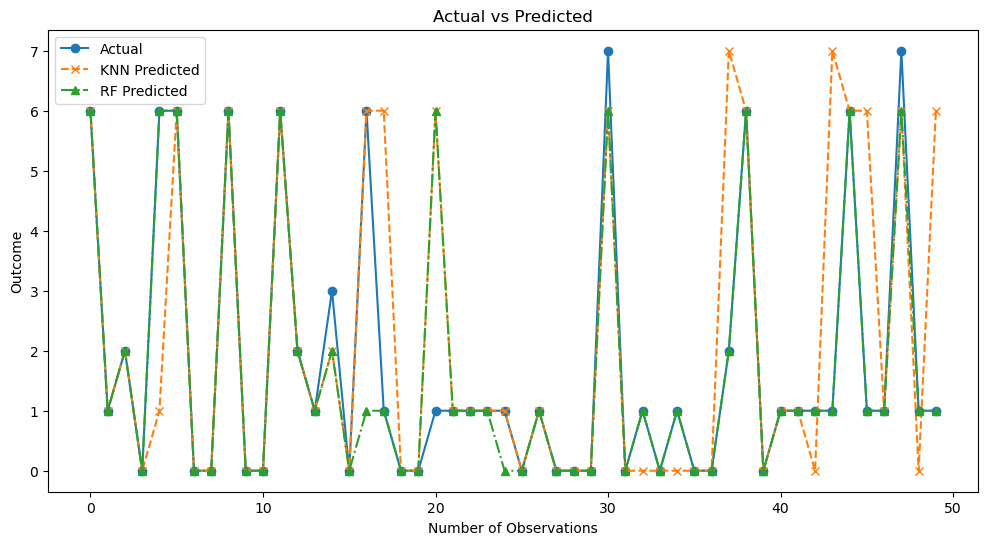

In [28]:
def plot_actual_vs_predicted(y_test, knn_predictions, rf_predictions):
    df = pd.DataFrame({'Actual': y_test, 'KNN Predicted': knn_predictions, 'RF Predicted': rf_predictions})
    df = df.reset_index(drop=True)
    
    plt.figure(figsize=(12,6))
    plt.plot(df['Actual'][:50], marker='o', label='Actual')
    plt.plot(df['KNN Predicted'][:50], marker='x', linestyle='--', label='KNN Predicted')
    plt.plot(df['RF Predicted'][:50], marker='^', linestyle='-.', label='RF Predicted')
    plt.title('Actual vs Predicted')
    plt.xlabel('Number of Observations')
    plt.ylabel('Outcome')
    plt.legend()
    plt.show()

# Now call the plotting function with the predictions from both models
plot_actual_vs_predicted(y_test, knn_predictions, predictions)